 # EMISSION MAPPING FOR MULTISPECIES OF ATMOSPHERIC POLLUTANTS OVER THE CONUS

This project will explore how the emission varies spatially within the CONUS  for different species of atmospheric pollutants. For this purpose, it will analyze annual total emissions for VOCs, NOx, PM2.5, SO2, CO, and NH3 measured in terms of ton/km2/yr.


In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import pandas as pd

### DATASET
Neighborhood Emission Mapping Operation : The NEMO (http://air.csiss.gmu.edu/) provides  annual, monthly and hourly fine scale emissions data at 1km spatial resolution. Here, I am working with the annual data of the year 2017.

In [9]:
path = '/groups/ESS3/qtong/data/nemo2017/'
fname = 'emis_mole_all_2017ann_US01_cmaq_cb6ae7_2017gb_17j_nosoaalk.ncf'
ds = xr.open_dataset(path+fname)
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

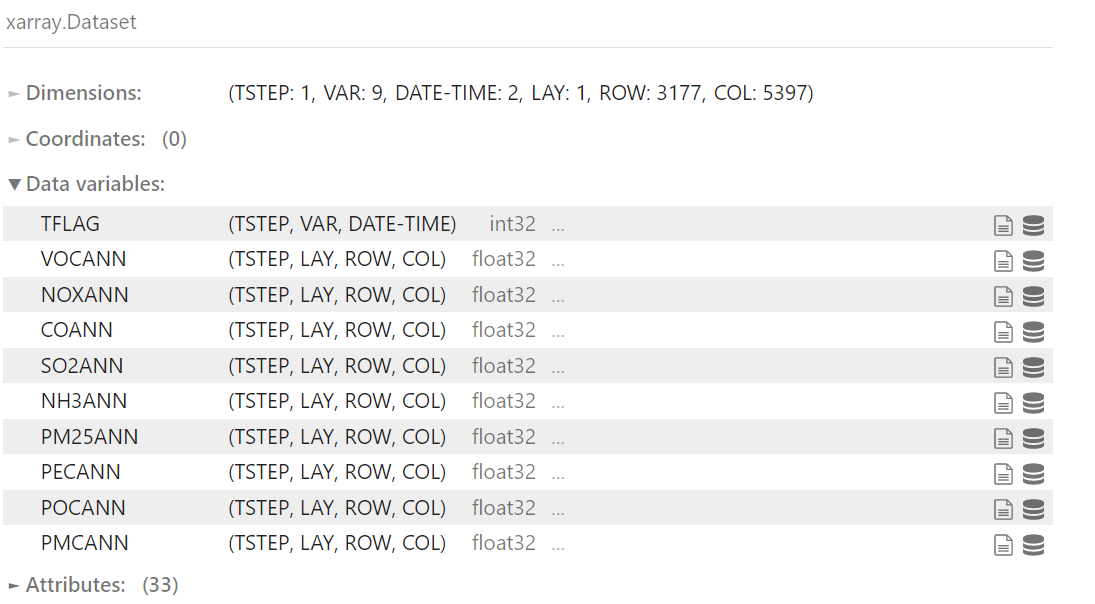

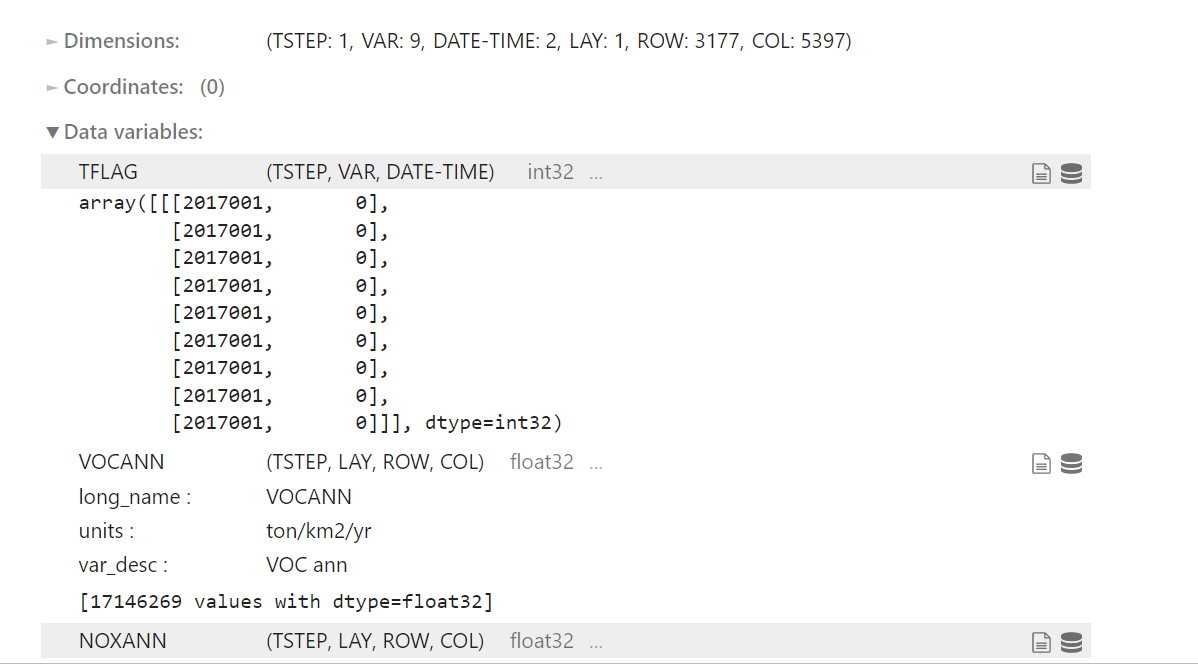

In [ ]:
print(ds['TFLAG'])

<xarray.DataArray 'TFLAG' (TSTEP: 1, VAR: 2, DATE-TIME: 2)>
array([[[2017001,       0],
        [2017001,       0]]], dtype=int32)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME
Attributes:
    units:      <YYYYDDD,HHMMSS>
    long_name:  TFLAG           
    var_desc:   Timestep-valid flags:  (1) YYYYDDD or (2) HHMMSS             ...


#### The geo registration data of this dataset which provides the  latitude and longitude coordinates;

In [4]:
path = '/home/aachar5/'
fname = 'GRID_LATLON_CENTRAL_US01.ncf'
ds_coord = xr.open_dataset(path+fname)
ds_coord

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 2, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    LAT      (TSTEP, LAY, ROW, COL) float32 ...
    LON      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022230
    CTIME:          160047
    WDATE:          2022230
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          OUTFILE         
    VAR-LIST:       LAT             LON             
    FILEDESC:       
    HISTORY:

### PROPOSED ANALYSIS
- I plan to use the data sets above to conduct the following analysis:
- Calculate annual mean and climatology of the emissions for the given species
- Compare the emissions plots of remaining species with PM2.5 mainly to see the responses of increase or reduction of SO2, NO2 emission on the PM2.5 concentration with a regression analysis
- Calculate the anomaly in emission of PM2.5


In [7]:
ds_mean=ds.mean(dim='DATE-TIME')
ds

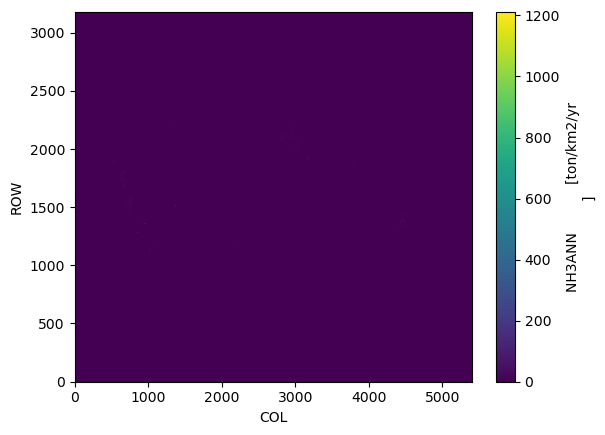

In [11]:
ds.NH3ANN[0,0,:,:].plot()

In [ ]:
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['longitude'], ds['latitude'], ds_mean['t'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines() 
;